In [1]:
import os
os.getcwd()

'C:\\Users\\jiaji'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

# 1. Import data

In [3]:
data=pd.read_csv("rankingcard.csv")

In [4]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


# 2. Drop duplicates

In [8]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [9]:
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


# 3. Add missing values

## 3.1 NumberOfDependents(use mean to fillna)

In [10]:
#data.isnull().sum()/data.shape[0]
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [11]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

## 3.2 MonthlyIncome(use randomforest to fillna)

In [12]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
def fill_missing_rf(to_fill):
    df=data.copy()
    fill=df.loc[:,to_fill]
    x=df.loc[:,df.columns!=to_fill]
    
    y_train=fill[fill.notnull()]
    y_test=fill[fill.isnull()]
    x_train=x.iloc[y_train.index,:]
    x_test=x.iloc[y_test.index,:]
    
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr=rfr(n_estimators=100)
    rfr=rfr.fit(x_train,y_train)
    ypredict=rfr.predict(x_test)
    
    data.loc[data.MonthlyIncome.isnull(),to_fill]=ypredict
    return data

In [14]:
fill_missing_rf(to_fill="MonthlyIncome")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.00,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.00,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.00,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.00,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.00,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.00,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,0.20,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.00,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,0.28,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.00,9,0,4,0,2.0


In [15]:
data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

# 4. Delete outliers

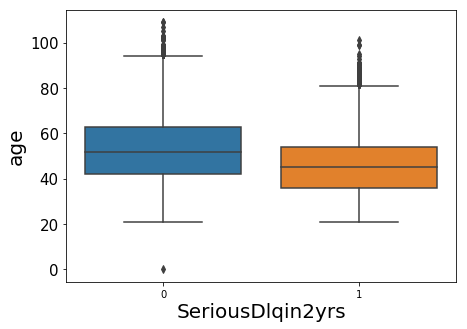

In [16]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot('SeriousDlqin2yrs','age',data=data)
plt.ylabel('age',fontsize=20.0)
plt.xlabel('SeriousDlqin2yrs',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()

In [17]:
data=data.loc[data.age!=0,:]
data=data.loc[data.age<=100,:]

In [18]:
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149377 entries, 0 to 149376
Data columns (total 11 columns):
SeriousDlqin2yrs                        149377 non-null int64
RevolvingUtilizationOfUnsecuredLines    149377 non-null float64
age                                     149377 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149377 non-null int64
DebtRatio                               149377 non-null float64
MonthlyIncome                           149377 non-null float64
NumberOfOpenCreditLinesAndLoans         149377 non-null int64
NumberOfTimes90DaysLate                 149377 non-null int64
NumberRealEstateLoansOrLines            149377 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149377 non-null int64
NumberOfDependents                      149377 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


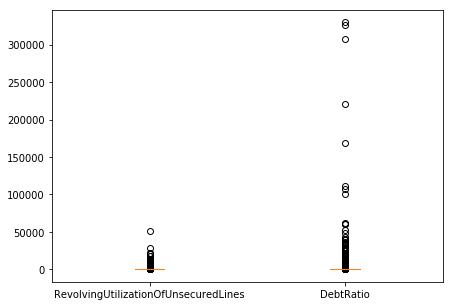

In [19]:
fig,ax=plt.subplots(figsize=(7,5))
x1=data['RevolvingUtilizationOfUnsecuredLines']
x2=data['DebtRatio']
ax.boxplot([x1,x2],data=data)
ax.set_xticklabels(['RevolvingUtilizationOfUnsecuredLines','DebtRatio'])
plt.show()

In [20]:
data=data.loc[data.RevolvingUtilizationOfUnsecuredLines<=1,:]
data=data.loc[data.DebtRatio<=1,:]

In [21]:
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111654 entries, 0 to 111653
Data columns (total 11 columns):
SeriousDlqin2yrs                        111654 non-null int64
RevolvingUtilizationOfUnsecuredLines    111654 non-null float64
age                                     111654 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    111654 non-null int64
DebtRatio                               111654 non-null float64
MonthlyIncome                           111654 non-null float64
NumberOfOpenCreditLinesAndLoans         111654 non-null int64
NumberOfTimes90DaysLate                 111654 non-null int64
NumberRealEstateLoansOrLines            111654 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    111654 non-null int64
NumberOfDependents                      111654 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.4 MB


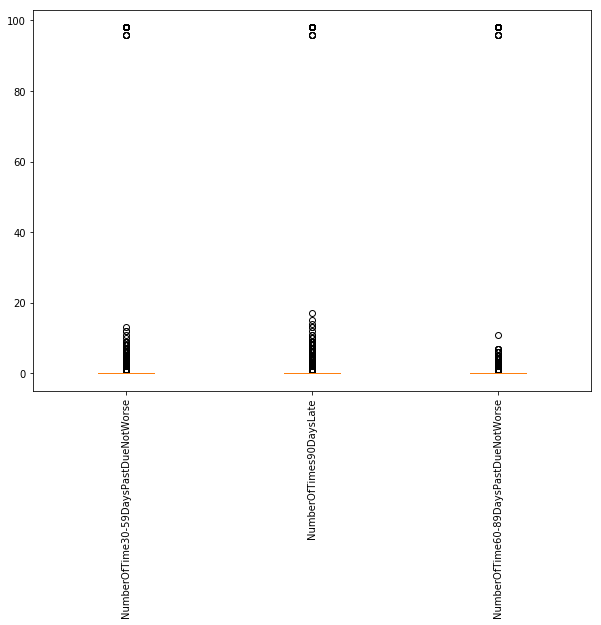

In [22]:
fig,ax=plt.subplots(figsize=(10,7))
plt.xticks(rotation='90')
x1=data['NumberOfTime30-59DaysPastDueNotWorse']
x2=data['NumberOfTimes90DaysLate']
x3=data['NumberOfTime60-89DaysPastDueNotWorse']
ax.boxplot([x1,x2,x3],data=data)
ax.set_xticklabels(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'],)
plt.show()

In [23]:
data=data.loc[data["NumberOfTime30-59DaysPastDueNotWorse"] <=80,:]
data=data.loc[data["NumberOfTimes90DaysLate"] <=80,:]
data=data.loc[data["NumberOfTime60-89DaysPastDueNotWorse"] <=80,:]
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111456 entries, 0 to 111455
Data columns (total 11 columns):
SeriousDlqin2yrs                        111456 non-null int64
RevolvingUtilizationOfUnsecuredLines    111456 non-null float64
age                                     111456 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    111456 non-null int64
DebtRatio                               111456 non-null float64
MonthlyIncome                           111456 non-null float64
NumberOfOpenCreditLinesAndLoans         111456 non-null int64
NumberOfTimes90DaysLate                 111456 non-null int64
NumberRealEstateLoansOrLines            111456 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    111456 non-null int64
NumberOfDependents                      111456 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.4 MB


# 4. Explore analysis

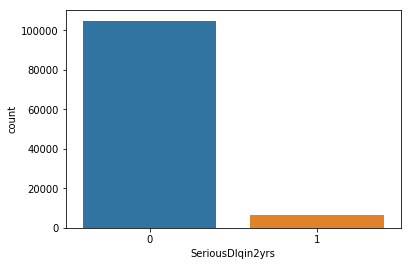

In [24]:
sns.countplot(x="SeriousDlqin2yrs",data=data)

In [25]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('the number of sample：{}; bad:{:.2%}; good:{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

the number of sample：111456; bad:5.97%; good:94.03%


In [26]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [27]:
#group NumberOfTime30-59DaysPastDueNotWorse
t=data.copy()
t["group30_59"]=0
group1=t.loc[(t['NumberOfTime30-59DaysPastDueNotWorse']>=0) & (t['NumberOfTime30-59DaysPastDueNotWorse']<4),:]
group2=t.loc[(t['NumberOfTime30-59DaysPastDueNotWorse']>=4) & (t['NumberOfTime30-59DaysPastDueNotWorse']<8),:]
group3=t.loc[(t['NumberOfTime30-59DaysPastDueNotWorse']>=8) & (t['NumberOfTime30-59DaysPastDueNotWorse']<=13),:]
t.loc[group1.index,'group30_59']="[0,4)"
t.loc[group2.index,'group30_59']="[4,8)"
t.loc[group3.index,'group30_59']="[8,13]"

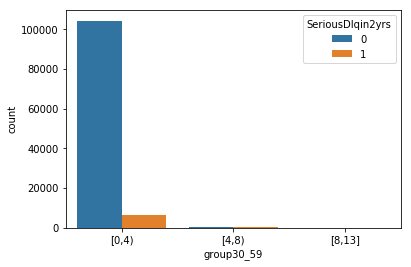

In [28]:
sns.countplot(x="group30_59",data=t,hue="SeriousDlqin2yrs")

In [29]:
#group NumberOfTimes90DaysLate
t=data.copy()
t["group_NumberOfTimes90DaysLate"]=0
group1=t.loc[(t['NumberOfTimes90DaysLate']>=0) & (t['NumberOfTimes90DaysLate']<3),:]
group2=t.loc[(t['NumberOfTimes90DaysLate']>=3) & (t['NumberOfTimes90DaysLate']<6),:]
group3=t.loc[(t['NumberOfTimes90DaysLate']>=6) & (t['NumberOfTimes90DaysLate']<9),:]
group4=t.loc[(t['NumberOfTimes90DaysLate']>=9) & (t['NumberOfTimes90DaysLate']<12),:]
group5=t.loc[(t['NumberOfTimes90DaysLate']>=12) & (t['NumberOfTimes90DaysLate']<15),:]
group6=t.loc[(t['NumberOfTimes90DaysLate']>=15) & (t['NumberOfTimes90DaysLate']<18),:]
t.loc[group1.index,'group_NumberOfTimes90DaysLate']="[0,4)"
t.loc[group2.index,'group_NumberOfTimes90DaysLate']="[3,6)"
t.loc[group3.index,'group_NumberOfTimes90DaysLate']="[6,9)"
t.loc[group4.index,'group_NumberOfTimes90DaysLate']="[9,12)"
t.loc[group5.index,'group_NumberOfTimes90DaysLate']="[12,15)"
t.loc[group6.index,'group_NumberOfTimes90DaysLate']="[15,18)"

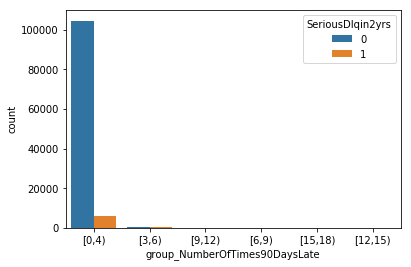

In [30]:
sns.countplot(x="group_NumberOfTimes90DaysLate",data=t,hue="SeriousDlqin2yrs")

In [31]:
def graph_continuous_variables(variable):
    df2=t.loc[t["SeriousDlqin2yrs"]==1,:].groupby([variable])[variable].count().reset_index(name="count")
    df2["bad_ratio"]=df2["count"]/df2["count"].sum()*100
    df3=t.loc[t["SeriousDlqin2yrs"]==0,:].groupby([variable])[variable].count().reset_index(name="count")
    df3["good_ratio"]=df3["count"]/df3["count"].sum()*100

    ax,fig=plt.subplots(figsize=(11,6))
    plt.plot(df2[variable],df2["bad_ratio"],marker = 'o')
    plt.plot(df3[variable],df3["good_ratio"],marker = 'o')
    plt.title('Bad(good) ratio vs {}'.format(variable))
    plt.ylabel('ratio')
    plt.xlabel(variable)
    plt.legend(["bad_ratio","good_ratio"])
plt.show()

In [32]:
t.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'group_NumberOfTimes90DaysLate'],
      dtype='object')

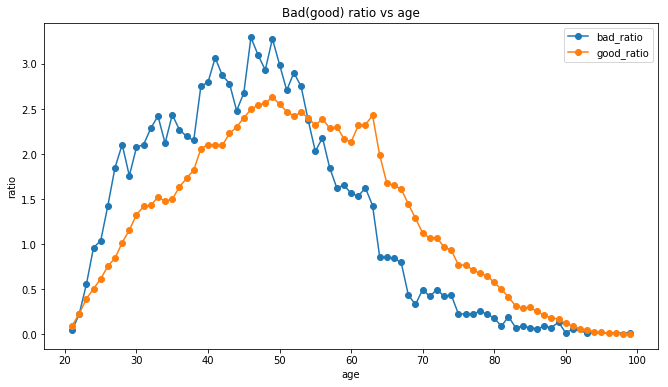

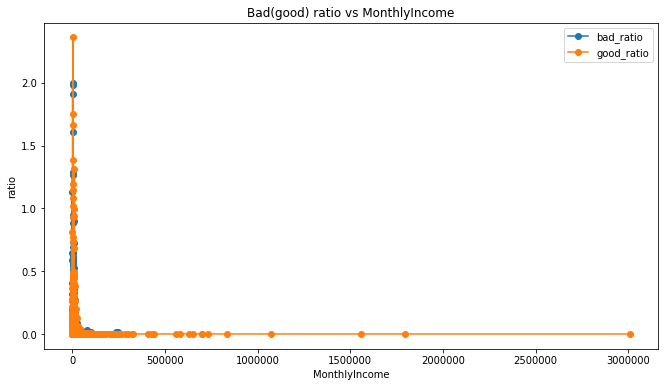

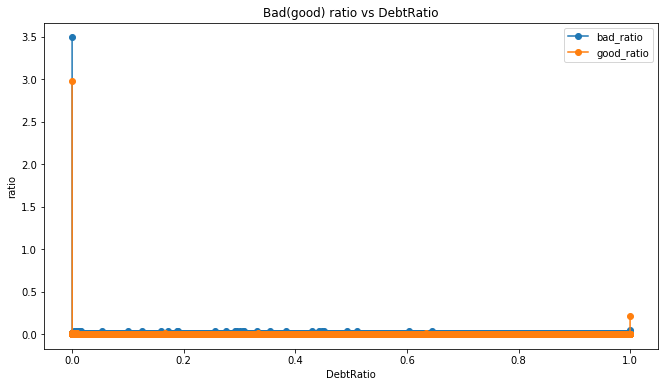

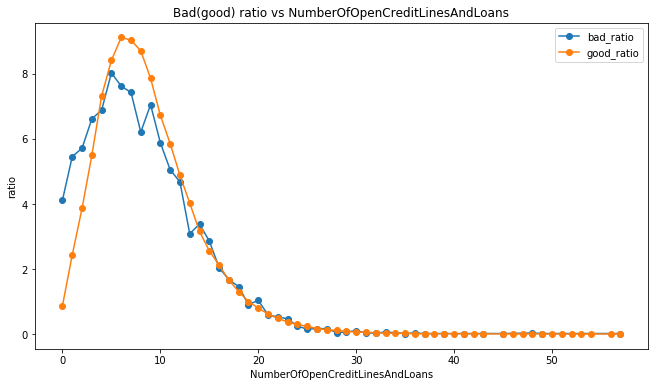

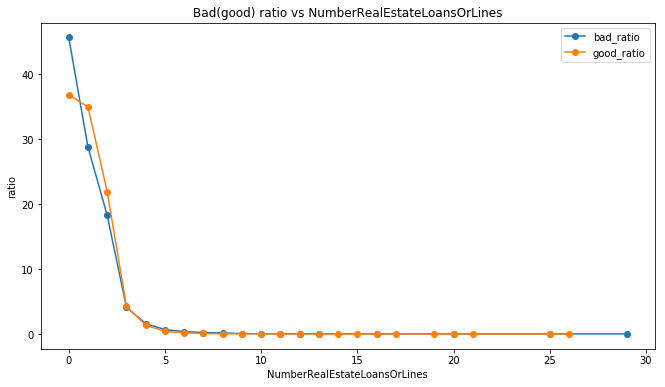

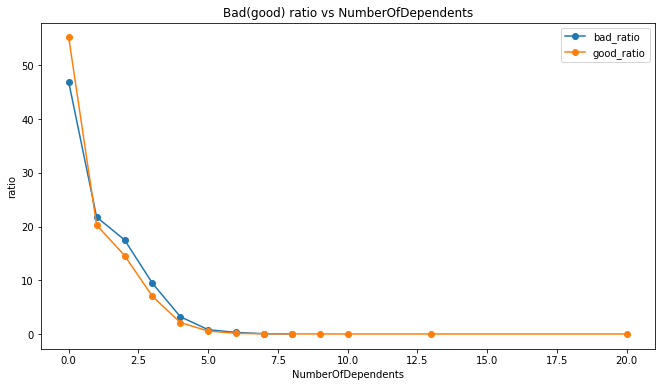

In [33]:
for column in ["age","MonthlyIncome","DebtRatio","NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines","NumberOfDependents"]:
    graph_continuous_variables(column)

Text(0.5,1,'Heatmap of rankingscore')

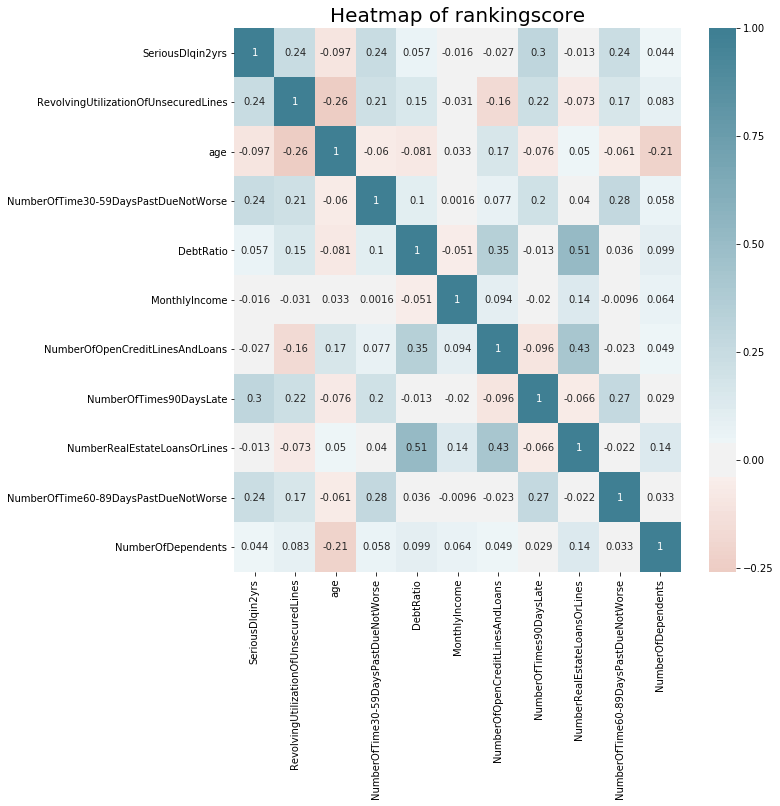

In [34]:
plt.subplots(figsize = (10,10)) 
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0);
plt.title("Heatmap of rankingscore", fontsize = 20)

# 5. Unbalanced distribution

In [37]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X,y=sm.fit_sample(X,y)
n_sample_=X.shape[0]
pd.Series(y).value_counts()
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('the number of samples：{}; bad:{:.2%}; good:{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

the number of samples：209612; bad:50.00%; good:50.00%


# 6. Split data as training and testing

In [55]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=0)
model_data=pd.concat([y_train,X_train],axis=1)
model_data.index=range(model_data.shape[0])
model_data.columns=data.columns

valid_data = pd.concat([y_valid, x_valid], axis=1)
valid_data.index = range(valid_data.shape[0])
valid_data.columns = data.columns

model_data.to_csv("model_data.csv")
valid_data.to_csv("vilid_data.csv")

# 7. Data bining

In [ ]:
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [67]:
count_y0=model_data[model_data["SeriousDlqin2yrs"]==0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1=model_data[model_data["SeriousDlqin2yrs"]==1].groupby(by="qcut").count()["SeriousDlqin2yrs"]
num_bins=[*zip(updown,updown[1:],count_y0,count_y1)]
num_bins

[(21.0, 28.0, 3288, 5717),
 (28.0, 31.0, 2917, 4578),
 (31.0, 33.0, 2135, 3422),
 (33.0, 36.0, 3429, 5000),
 (36.0, 39.0, 4168, 5530),
 (39.0, 41.0, 3103, 4526),
 (41.0, 42.0, 1545, 2210),
 (42.0, 44.0, 3339, 4163),
 (44.0, 46.0, 3628, 4755),
 (46.0, 48.0, 3728, 4774),
 (48.0, 50.0, 3739, 4708),
 (50.0, 51.0, 1801, 2141),
 (51.0, 53.0, 3573, 4148),
 (53.0, 55.0, 3438, 3291),
 (55.0, 58.0, 5150, 4128),
 (58.0, 60.0, 3181, 2442),
 (60.0, 63.0, 5200, 2873),
 (63.0, 67.0, 5115, 1957),
 (67.0, 73.0, 5157, 1618),
 (73.0, 99.0, 5893, 1220)]

In [68]:
def get_woe(num_bins):
    # use num_bins to calculate woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#calculate iv
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

<Figure size 432x288 with 0 Axes>

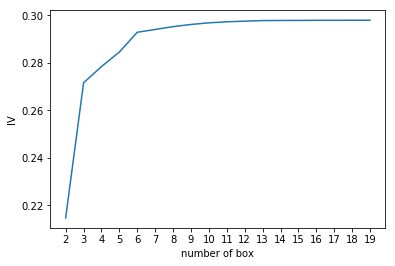

In [72]:
num_bins_=num_bins.copy()
import scipy
IV=[]
axisx=[]
while len(num_bins_)>2:
    pvs=[]
    for i in range(len(num_bins_)-1):
        x1=num_bins_[i][2:]
        x2=num_bins_[i+1][2:]
        pv=scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    i=pvs.index(max(pvs))
    num_bins_[i:i+2]=[(num_bins_[i][0],
                      num_bins_[i+1][1],
                      num_bins_[i][2]+num_bins_[i+1][2],
                      num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df=get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [73]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.000714,67,0,0.000000,4470.636667,5,0,0,0,0.000000,"(63.0, 67.0]"
1,0,0.537333,67,0,0.658418,8000.000000,15,0,3,0,2.000000,"(63.0, 67.0]"
2,0,0.016516,97,0,0.008581,1747.000000,2,0,0,0,0.000000,"(73.0, 99.0]"
3,0,0.925439,54,1,0.315772,2979.000000,6,0,0,0,0.000000,"(53.0, 55.0]"
4,1,0.108605,49,0,0.189187,4200.000000,6,0,0,0,3.831394,"(48.0, 50.0]"


In [76]:
model_data.columns[1:-1]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [102]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
   Automatic optimal binning function, binning based on chi-square test
   paramaters：
   DF: the full dataset
   X: the column which should be binned 
   Y: the target column
   n: the number of bins you want to stay
   q: the number of initial bins
   graph: whether you want to plot
   """    
    
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    #calculate woe
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    #calculate iv
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:    
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.show()
    return get_woe(num_bins)

RevolvingUtilizationOfUnsecuredLines


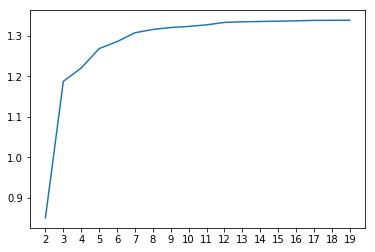

age


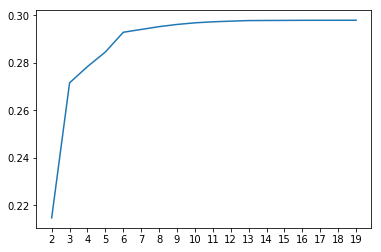

NumberOfTime30-59DaysPastDueNotWorse


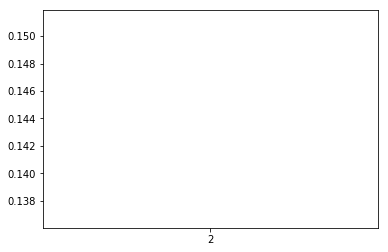

DebtRatio


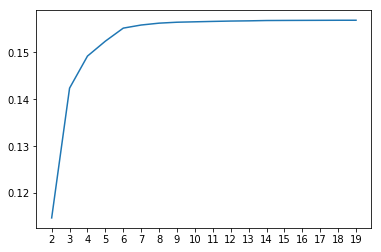

MonthlyIncome


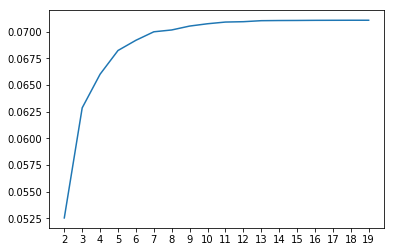

NumberOfOpenCreditLinesAndLoans


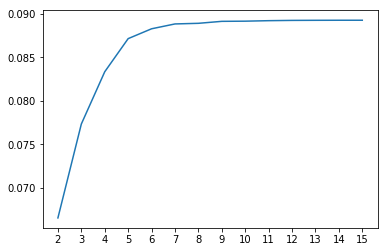

NumberOfTimes90DaysLate


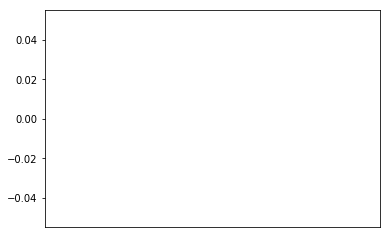

NumberRealEstateLoansOrLines


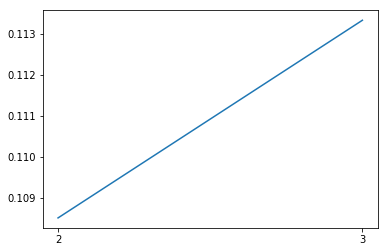

NumberOfTime60-89DaysPastDueNotWorse


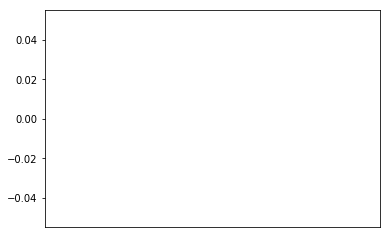

NumberOfDependents


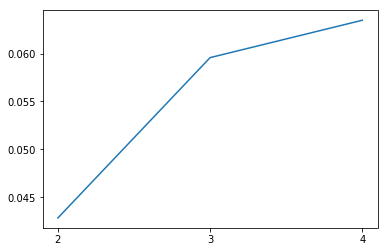

In [103]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [84]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                 "age":5,
                 "DebtRatio":4,
                 "MonthlyIncome":3,
                 "NumberOfOpenCreditLinesAndLoans":5,
                 'NumberOfDependents':3}

hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]}

In [94]:
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [95]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [110]:
bins_of_col={}
for col in auto_col_bins:
    bins_df=graphforbestbin(model_data,col,"SeriousDlqin2yrs",n=auto_col_bins[col],q=20,graph=False)
    bins_list=sorted(set(bins_df["min"]).union(bins_df["max"]))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [112]:
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0352203368,
  0.10053858008063277,
  0.2115796829719989,
  0.4265694310619742,
  0.5793844746876782,
  inf],
 'age': [-inf, 36.0, 53.0, 60.0, 63.0, inf],
 'DebtRatio': [-inf,
  0.008882248050000001,
  0.04559427293645782,
  0.3638151448230116,
  inf],
 'MonthlyIncome': [-inf, 3384.0, 6600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [120]:
data = model_data.copy()
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0,
74.0, np.inf])
data
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [121]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",31280,44675,-0.360879
"(48.5, 58.757]",17701,18416,-0.044042
"(58.757, 64.0]",9840,5860,0.513863
"(64.0, 74.0]",9483,3193,1.084096
"(74.0, inf]",5223,1057,1.593194


In [123]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] =np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0352]     2.398916
 (0.0352, 0.101]    1.515121
 (0.101, 0.212]     0.732578
 (0.212, 0.427]    -0.018165
 (0.427, 0.579]    -0.595900
 (0.579, inf]      -1.053661
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.468407
 (36.0, 53.0]   -0.259899
 (53.0, 60.0]    0.172438
 (60.0, 63.0]    0.588858
 (63.0, inf]     1.210831
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.00888]      1.634561
 (0.00888, 0.0456]    0.429732
 (0.0456, 0.364]      0.039400
 (0.364, inf]        -0.271859
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 3384.0]     -0.327725
 (3384.0, 6600.0]   -0.068691
 (6600.0, inf]       0.315486
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.931640
 (1.0, 3.0]    -0.399590
 (3.0, 5.0]    -0.039852
 (5.0, 17.0]    0.132638
 (17.0, inf]    0.466589
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.296150
 (0.0, 1.0]    -0.791686
 (1.0, 2.0]    -1.258660
 (2.0, inf]    -1.41

In [131]:
model_woe = pd.DataFrame(index=model_data.index)
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.398916,1.210831,1.634561,-0.068691,-0.039852,0.296150,0.206546,-0.405521,0.096129,0.755859,0
1,-0.595900,1.210831,-0.271859,0.315486,0.132638,0.296150,0.206546,0.595151,0.096129,-0.474840,0
2,2.398916,1.210831,1.634561,-0.327725,-0.399590,0.296150,0.206546,-0.405521,0.096129,0.755859,0
3,-1.053661,0.172438,0.039400,-0.327725,0.132638,-0.791686,0.206546,-0.405521,0.096129,0.755859,0
4,0.732578,-0.259899,0.039400,-0.068691,0.132638,0.296150,0.206546,-0.405521,0.096129,-0.481627,1


In [133]:
vali_woe = pd.DataFrame(index=valid_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(valid_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = valid_data["SeriousDlqin2yrs"]
valid_X = vali_woe.iloc[:,:-1]
valid_y = vali_woe.iloc[:,-1]

# 8. Logistic regression     

In [135]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)
lr.score(valid_X,valid_y)

0.7725176515488836

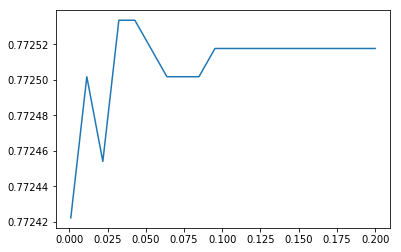

In [141]:
c_1 = np.linspace(0.001,1,20)
c_2 = np.linspace(0.001,0.2,20)

score = []
for i in c_1:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(valid_X,valid_y))
plt.figure()
plt.plot(c_2,score)
plt.show()


C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

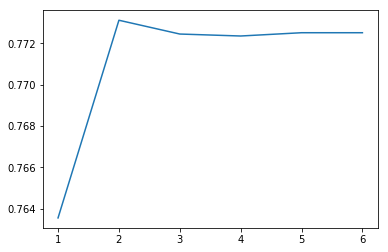

In [142]:
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear',C=0.05,max_iter=i).fit(X,y)
    score.append(lr.score(valid_X,valid_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

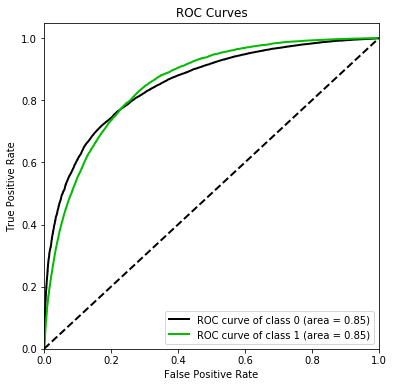

In [144]:
import scikitplot as skplt
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(valid_X))
skplt.metrics.plot_roc(valid_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)

In [145]:
lr.coef_[0][0]

-0.7263097849953143

In [149]:
score_age = woeall["age"] * (-1*lr.coef_[0][0])
score_age.name="Score"

In [155]:
score_age

cut
(-inf, 36.0]   -0.340208
(36.0, 53.0]   -0.188767
(53.0, 60.0]    0.125243
(60.0, 63.0]    0.427694
(63.0, inf]     0.879438
Name: Score, dtype: float64